# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-05-14 23:58:39.174840: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 23:58:39.175224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 23:58:39.177271: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 23:58:39.204740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 23:58:39.734371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=12345)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10:	 accuracy 9.500%	 loss 11.393%
Epoch 2/10:	 accuracy 9.900%	 loss 9.805%
Epoch 3/10:	 accuracy 9.700%	 loss 9.804%
Epoch 4/10:	 accuracy 9.700%	 loss 9.804%
Epoch 5/10:	 accuracy 9.700%	 loss 9.804%
Epoch 6/10:	 accuracy 9.700%	 loss 9.804%
Epoch 7/10:	 accuracy 9.700%	 loss 9.804%
Epoch 8/10:	 accuracy 9.700%	 loss 9.804%
Epoch 9/10:	 accuracy 9.700%	 loss 9.804%
Epoch 10/10:	 accuracy 9.700%	 loss 9.804%


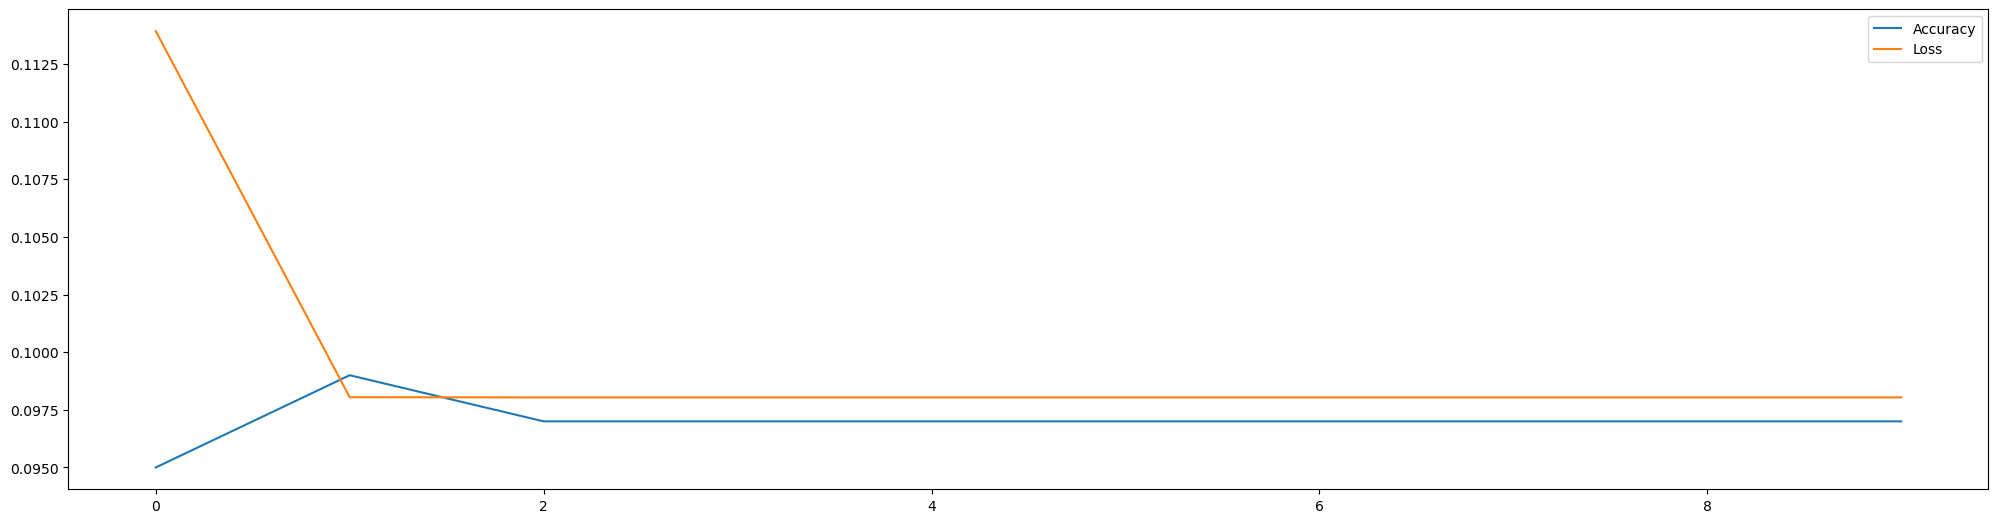

In [7]:
fig = plt.figure().add_axes([0,0,3,1])
fig.plot(model.history['accuracy'])
fig.plot(model.history['loss'])
plt.legend(["Accuracy", "Loss"])
plt.show()

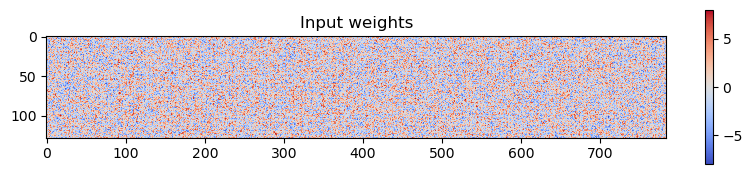

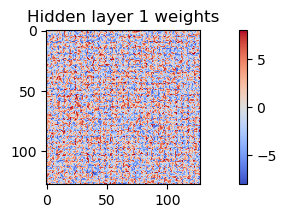

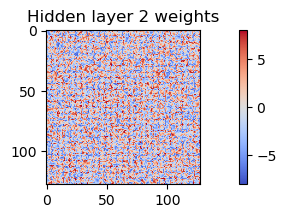

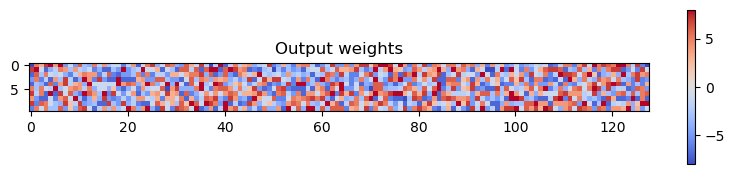

In [8]:
def show_weights(weights, title=None):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.title(title)
    plt.show()

show_weights(model.input_weights, "Input weights")
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l], f"Hidden layer {l + 1} weights")
show_weights(model.output_weights, "Output weights")
# model.output_weights

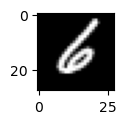

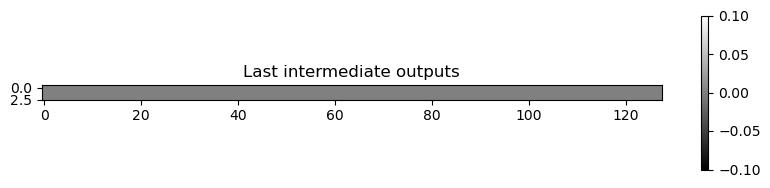

[0 0 0 0 0 0 0 0 0 0] --> 0


In [9]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.show()
# for l in range(model.config["layers"]):
#     print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="vertical")
plt.title("Last intermediate outputs")
plt.show()
print(model.last_outputs, "-->", model.last_answer)